MLI Module 4 Assignment 1

see Module 4 - Lecture 17 - Regularisation and Optimisation.pdf on L1 and L2

In [1]:
import pandas as pd # data frames
import numpy as np

In [11]:
# read data
df = pd.read_csv("MLI Data Assignment 1.csv", index_col='year')
df.head()

,qr,roe,wcoa,reoa,eoa,edr,dd,sr,vol,return
year,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985.0,6.979253,-0.025060,0.825243,-1.762136,-0.327184,119.490500,1.439205,5.258117,0.639888,3.365
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985.0,0.366087,0.145088,0.460968,0.430453,0.114718,2.108288,1.017459,2.859285,1.140449,3.261
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df.index = df.index.astype(int)

In [37]:
df.shape

(21935, 10)

In [38]:
df.describe()

,qr,roe,wcoa,reoa,eoa,edr,dd,sr,vol,return
count,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000
mean,2.058294,-5.668109,-2.177798,-19.911232,-0.887694,29.342611,1.367895,0.274550,5.665615,1.203678
std,20.528246,606.173803,185.189412,657.400766,50.153790,472.762696,16.134272,1.484090,141.266594,26.252376
min,0.000008,-88875.137010,-25967.974360,-55576.000000,-6313.000000,0.000020,-1967.526223,-2.533056,0.019629,-1.000000
25%,0.076733,-0.117017,0.206121,-0.521662,-0.051757,1.051082,0.904552,-0.453150,0.377869,-0.343500
50%,0.305719,0.025415,0.438835,0.017834,0.038708,3.366596,1.519760,-0.032473,0.596584,-0.021000
75%,1.119911,0.070114,0.665494,0.198595,0.096758,10.878026,2.385868,0.681469,0.991382,0.344000
max,2204.000000,7468.650000,0.999723,2.073072,6.475407,45718.500000,50.941268,91.532453,9898.965329,1765.906000


In [19]:
# remove all null values if any
df.isnull().sum()[df.isnull().sum() != 0]

qr        21935
roe       21935
wcoa      21935
reoa      21935
eoa       21935
edr       21935
dd        21935
sr        21935
vol       21935
return    21935
dtype: int64

In [28]:
# drop all rows with NaN/null values
df = df.dropna(axis=0)
# check again
print(df.isnull().sum()[df.isnull().sum() != 0])
print(df.shape)

Series([], dtype: int64)
(21935, 10)


In [30]:
df.describe()

,qr,roe,wcoa,reoa,eoa,edr,dd,sr,vol,return
count,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000
mean,2.058294,-5.668109,-2.177798,-19.911232,-0.887694,29.342611,1.367895,0.274550,5.665615,1.203678
std,20.528246,606.173803,185.189412,657.400766,50.153790,472.762696,16.134272,1.484090,141.266594,26.252376
min,0.000008,-88875.137010,-25967.974360,-55576.000000,-6313.000000,0.000020,-1967.526223,-2.533056,0.019629,-1.000000
25%,0.076733,-0.117017,0.206121,-0.521662,-0.051757,1.051082,0.904552,-0.453150,0.377869,-0.343500
50%,0.305719,0.025415,0.438835,0.017834,0.038708,3.366596,1.519760,-0.032473,0.596584,-0.021000
75%,1.119911,0.070114,0.665494,0.198595,0.096758,10.878026,2.385868,0.681469,0.991382,0.344000
max,2204.000000,7468.650000,0.999723,2.073072,6.475407,45718.500000,50.941268,91.532453,9898.965329,1765.906000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21935 entries, 1985 to 2017
Data columns (total 10 columns):
qr        21935 non-null float64
roe       21935 non-null float64
wcoa      21935 non-null float64
reoa      21935 non-null float64
eoa       21935 non-null float64
edr       21935 non-null float64
dd        21935 non-null float64
sr        21935 non-null float64
vol       21935 non-null float64
return    21935 non-null float64
dtypes: float64(10)
memory usage: 1.8 MB


In [24]:
# defining vars
input_vars = ["qr", "roe", "wcoa", "reoa", "eoa", "edr", "dd", "sr", "vol"]
target = ["return"]

In [25]:
X = df.drop(labels=target, axis=1)
X.head()

,qr,roe,wcoa,reoa,eoa,edr,dd,sr,vol
year,,,,,,,,,
1985.0,6.979253,-0.025060,0.825243,-1.762136,-0.327184,119.490500,1.439205,5.258117,0.639888
1985.0,0.366087,0.145088,0.460968,0.430453,0.114718,2.108288,1.017459,2.859285,1.140449
1985.0,0.167489,0.009445,0.494797,0.185266,0.138259,15.030330,0.171042,0.477294,4.755013
1985.0,0.049812,0.016664,0.321690,0.114644,0.105986,10.288281,1.109971,2.946292,0.678819
1985.0,0.926230,0.064134,0.689753,0.170997,0.145380,11.486287,1.360837,2.831762,0.679110


In [29]:
y = df.drop(labels=input_vars, axis=1)
y.head()

,return
year,
1985.0,3.365
1985.0,3.261
1985.0,2.270
1985.0,2.000
1985.0,1.923


In [40]:
import time
from sklearn.ensemble import IsolationForest
start = time.time()
    
If = IsolationForest()
If.fit(X) 
y_pred = If.predict(X)

np.count_nonzero(y_pred == -1)

C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


array([-1,  1,  1, ...,  1,  1, -1])

In [57]:
hist = np.histogram(y_pred, bins=2)
print(f"#Outliers: {hist[0][0]}\n#Inliers: {hist[0][1]}")

#Outliers: 2194
#Inliers: 19741


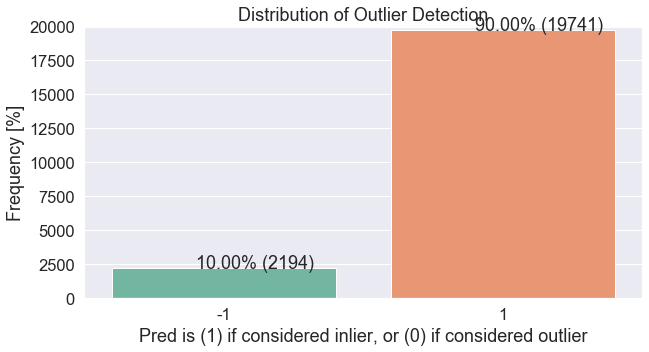

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x = y_pred ,palette="Set2")
sns.set(font_scale=1.5)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=round(y_pred.shape[0], -len(str(y_pred.shape[0]))+1))
for p in ax.patches:
    ax.annotate('{:.2f}% ({})'.format(100*p.get_height()/len(y_pred), p.get_height()), 
                (p.get_x()+ 0.3, p.get_height()+10))

plt.title('Distribution of Outlier Detection')
plt.xlabel('Pred is (1) if considered inlier, or (0) if considered outlier')
plt.ylabel('Frequency [%]')
plt.show()

In [62]:
# remove outliers from data
df_wo_outliers = df[y_pred == 1]
df_wo_outliers.shape

(19741, 10)